# Dataset creation

In [ ]:
"""
Install requirements
"""

!pip3 install -r requirements.txt
!pip3 install prettytable

In [1]:
"""
Imports external and own libraries
"""

import pickle


import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader

from prettytable import PrettyTable

# own
import common.action as action
import common.world as world
import common.plot as plot
import common.preprocess as preprocess
import common.nets as nets
import common.train as train
import common.tools as tools

/Users/mariuskaestingschaefer/miniforge3/envs/pytorch/lib/python3.8/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/mariuskaestingschaefer/miniforge3/envs/pytorch/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/mariuskaestingschaefer/miniforge3/envs/pytorch/lib/python3.8/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, '__version__') or LooseVersion(tensorboard.__version__) < LooseVersion('1.15'):


### Example to show the MiniWorld Environment

In [ ]:
"""
Create and visualize the world
"""
env = world.init_env("MiniWorld-Maze-v0")
plot.plot_obs_top_dep(env)
world.print_env_parameters(env)

env = world.init_env("MiniWorld-TMaze-v0")
plot.plot_obs_top_dep(env)
world.print_env_parameters(env)

### Create datasets within the large Maze

In [ ]:
"""
(1) Create Oracle dataset
"""
oracle_actions = action.oracle_actions()
env = world.init_env("MiniWorld-Maze-v0")
oracle_data = collector.collect(oracle_actions, env, img_size=32, show=False)

with open("datasets/oracle_data.pickle", "wb") as handle:
    pickle.dump(oracle_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

"""
(2) Create Oracle + reversed dataset
"""
oracle_actions = action.oracle_actions()
env = world.init_env("MiniWorld-Maze-v0")
reversed_actions = action.reverse_action_seq(oracle_actions)
oracle_reversed_data = collector.collect(
    oracle_actions + reversed_actions, env, img_size=32, show=False
)

with open("datasets/oracle_reversed_data.pickle", "wb") as handle:
    pickle.dump(oracle_reversed_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

"""
(3) Create Oracle dataset with random actions inbetween
"""
env = world.init_env("MiniWorld-Maze-v0")
oracle_random_actions = action.add_randomness(oracle_actions, env)
oracle_random_data = collector.collect(
    oracle_random_actions, env, img_size=32, show=False
)

with open("datasets/oracle_random_data.pickle", "wb") as handle:
    pickle.dump(oracle_random_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

"""
(4) Create Oracle dataset with random actions inbetween + reversed
"""
oracle_actions = action.oracle_actions()
env = world.init_env("MiniWorld-Maze-v0")
oracle_random_actions = action.add_randomness(oracle_actions, env)
reversed_actions = action.reverse_action_seq(oracle_random_actions)
oracle_reversed_random_data = collector.collect(
    oracle_random_actions + reversed_actions, env, img_size=32, show=False
)

with open("datasets/oracle_reversed_random_data.pickle", "wb") as handle:
    pickle.dump(oracle_reversed_random_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

"""
(5) Create shortend Oracle dataset with random actions inbetween + reversed 
"""
oracle_actions = action.oracle_actions()
env = world.init_env("MiniWorld-Maze-v0")
oracle_random_actions = action.add_randomness(
    oracle_actions[0:500], env, random_step_lenth=1
)
reversed_actions = action.reverse_action_seq(oracle_random_actions)
oracle_reversed_random_data_small = collector.collect(
    oracle_random_actions + reversed_actions, env, img_size=32, show=False
)

with open("datasets/oracle_reversed_random_data_small.pickle", "wb") as handle:
    pickle.dump(
        oracle_reversed_random_data_small, handle, protocol=pickle.HIGHEST_PROTOCOL
    )

"""
(6) Create Random dataset
"""
env = world.init_env("MiniWorld-Maze-v0")
random_act = action.random_actions(5000, env)
random_data = collector.collect(random_act, env, img_size=32, show=False)

with open("datasets/random_data.pickle", "wb") as handle:
    pickle.dump(random_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Create datasets within the TMaze

In [ ]:
"""
(7) Create Random dataset
"""
env = world.init_env("MiniWorld-TMaze-v0")
random_seq = action.random_actions(2000, env)
tmaze_random_data = collector.collect(random_seq, env, img_size=32, show=False)

with open("datasets/tmaze_random_data.pickle", "wb") as handle:
    pickle.dump(tmaze_random_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

"""
(8) Create Random dataset
"""

env = world.init_env("MiniWorld-TMaze-v0")
tmaze_random_reverse_data = collector.collect(actions, env, img_size=32, show=False)

with open("datasets/tmaze_random_reverse_data.pickle", "wb") as handle:
    pickle.dump(tmaze_random_reverse_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load datasets

In [2]:
"""
Load data with pickle (deserialize)
"""

"""
(1) Load Oracle dataset
"""
with open("datasets/oracle_data.pickle", "rb") as handle:
    oracle_data = pickle.load(handle)

"""
(2) Load Oracle + reversed dataset
"""
with open("datasets/oracle_reversed_data.pickle", "rb") as handle:
    oracle_reversed_data = pickle.load(handle)

"""
(3) Load Oracle dataset with random actions inbetween
"""
with open("datasets/oracle_random_data.pickle", "rb") as handle:
    oracle_random_data = pickle.load(handle)

"""
(4) Load Oracle dataset with random actions inbetween + reversed
"""
with open("datasets/oracle_reversed_random_data.pickle", "rb") as handle:
    oracle_reversed_random_data = pickle.load(handle)

"""
(5) Load Oracle dataset with random actions inbetween + reversed
"""
with open("datasets/oracle_reversed_random_data_small.pickle", "rb") as handle:
    oracle_reversed_random_data_small = pickle.load(handle)

"""
(6) Load Random dataset (random walk on the large map)
"""
with open("datasets/random_data.pickle", "rb") as handle:
    random_data = pickle.load(handle)

"""
(7) Load Random dataset (random walk on the large map)
"""
with open("datasets/tmaze_random_data.pickle", "rb") as handle:
    tmaze_random_data = pickle.load(handle)

"""
(8) Load Random dataset (random walk on the large map)
"""
with open("datasets/tmaze_random_reverse_data.pickle", "rb") as handle:
    tmaze_random_reverse_data = pickle.load(handle)

### Example to visualize the data contained in each dataset

dict_keys(['actions', 'positions', 'angles', 'observations', 'top_views', 'depth_imgs'])


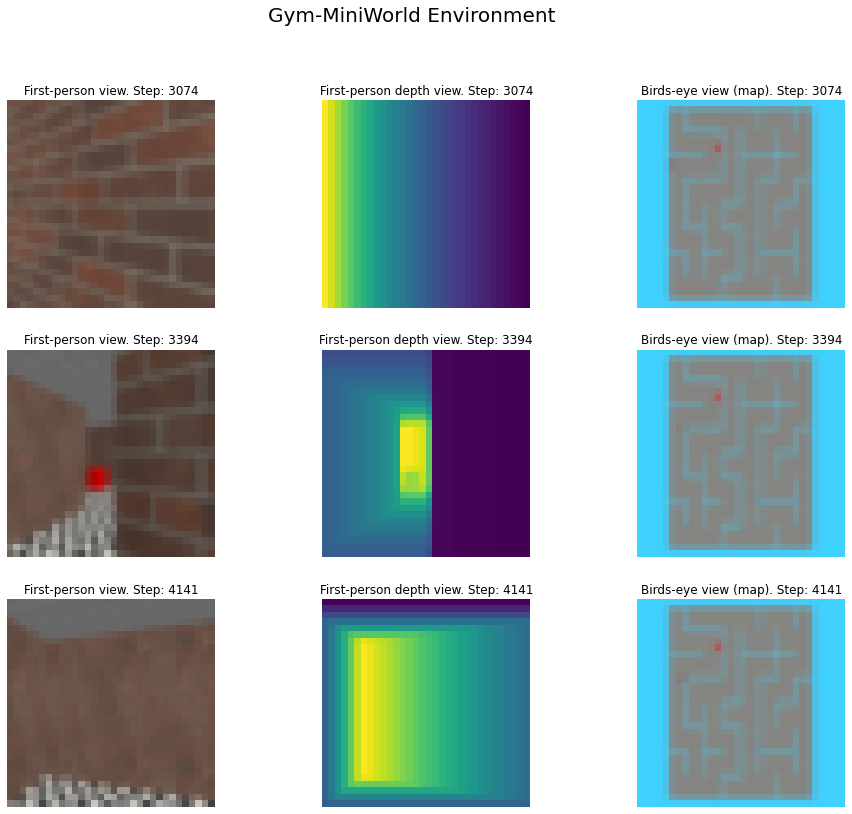

In [3]:
print(random_data.keys())
plot.plot_3x3_examples(random_data)

In [ ]:
"""
Use Turtle to plot the agents trajectory. 
A gif making function
"""

oracle_actions = action.oracle_actions()
plot.turtle_tracing(oracle_actions)
plot.save_gif_of_sequence(oracle_actions)

### Compare datasets

In [4]:
"""
Compare different datasets
"""

# print(str(count_actions(oracle_reversed_random_data)))

print("Large environment")
myTable = PrettyTable(["Dataset Name", "Length", "Distribution", "Environment"])
myTable.align["Dataset Name"] = "l"
myTable.add_row(
    [
        "Oracle data",
        len(oracle_data["actions"]),
        str(tools.count_actions(oracle_data)),
        "MiniWorld-Maze-v0",
    ]
)
myTable.add_row(
    [
        "Oracle data + reversed",
        len(oracle_reversed_data["actions"]),
        str(tools.count_actions(oracle_reversed_data)),
        "MiniWorld-Maze-v0",
    ]
)
myTable.add_row(
    [
        "Oracle data + random",
        len(oracle_random_data["actions"]),
        str(tools.count_actions(oracle_random_data)),
        "MiniWorld-Maze-v0",
    ]
)
myTable.add_row(
    [
        "Oracle data + random + reversed",
        len(oracle_reversed_random_data["actions"]),
        str(tools.count_actions(oracle_reversed_random_data)),
        "MiniWorld-Maze-v0",
    ]
)
myTable.add_row(
    [
        "Oracle small data + random + reversed",
        len(oracle_reversed_random_data_small["actions"]),
        str(tools.count_actions(oracle_reversed_random_data_small)),
        "MiniWorld-Maze-v0",
    ]
)
myTable.add_row(
    [
        "Random",
        len(random_data["actions"]),
        str(tools.count_actions(random_data)),
        "MiniWorld-Maze-v0",
    ]
)
print(myTable, "\n")

print("TMaze environment")
myTable = PrettyTable(["Dataset Name", "Length", "Distribution", "Environment"])
myTable.align["Dataset Name"] = "l"
myTable.add_row(
    [
        "Random exporation forwards",
        len(tmaze_random_data["actions"]),
        str(tools.count_actions(tmaze_random_data)),
        "MiniWorld-TMaze-v0",
    ]
)
myTable.add_row(
    [
        "Random exporation forwards+backwards",
        len(tmaze_random_reverse_data["actions"]),
        str(tools.count_actions(tmaze_random_reverse_data)),
        "MiniWorld-TMaze-v0",
    ]
)
print(myTable)

Large environment
+---------------------------------------+--------+--------------------------+-------------------+
| Dataset Name                          | Length |       Distribution       |    Environment    |
+---------------------------------------+--------+--------------------------+-------------------+
| Oracle data                           |  1195  |      [90, 115, 990]      | MiniWorld-Maze-v0 |
| Oracle data + reversed                |  2390  |   [205, 205, 990, 990]   | MiniWorld-Maze-v0 |
| Oracle data + random                  |  8365  | [2478, 2503, 2187, 1197] | MiniWorld-Maze-v0 |
| Oracle data + random + reversed       | 16730  | [5041, 5041, 3324, 3324] | MiniWorld-Maze-v0 |
| Oracle small data + random + reversed |  3000  |   [738, 738, 762, 762]   | MiniWorld-Maze-v0 |
| Random                                |  5000  |    [1693, 1690, 1617]    | MiniWorld-Maze-v0 |
+---------------------------------------+--------+--------------------------+-------------------+ 



In [6]:
from collections import Counter

"""
Show the distributions for the different trajectory lengths (dataset diversity)
"""


def show_information(dataset):

    actions = []
    for element in test_data["actions"]:
        actions.append(str(element[:]))

    print(len(set(actions)))
    count = Counter(actions)
    print(count)

    plt.rcParams["figure.figsize"] = 10, 5.5
    with plt.style.context("ggplot"):
        plt.bar(range(len(count)), count.values(), color="tab:blue")
        string = "Action seq. distribution for " + str(i) + " steps"
        plt.title(string, fontsize=22)
        plt.xlabel("Sequences", fontsize=18)
        plt.ylabel("Occurance", fontsize=16)
        plt.legend(fontsize=18)
        label = "tmaze_random_reverse_data" + str(i) + ".png"
        plt.show()


for i in range(1, 5):
    with open("datasets/oracle_reversed_random_data_small.pickle", "rb") as handle:
        oracle_reversed_random_data_small = pickle.load(handle)
    dataset = preprocess.split_n_steps_between(oracle_reversed_random_data_small, n=i)

    print("STEP ", str(i))
    show_information(dataset)
    print(" ")

STEP  1


NameError: name 'test_data' is not defined

In [ ]:
"""
Preprocess images (Normalize inputs)
"""

transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])

dataloader = torch.utils.data.DataLoader(
    oracle_train_data, batch_size=4096, shuffle=False, num_workers=4
)

pop_mean = []
pop_std0 = []
pop_std1 = []
for i, data in enumerate(dataloader, 0):
    # shape (batch_size, 3, height, width)
    numpy_image = data["image"].numpy()

    # shape (3,)
    batch_mean = np.mean(numpy_image, axis=(0, 2, 3))
    batch_std0 = np.std(numpy_image, axis=(0, 2, 3))
    batch_std1 = np.std(numpy_image, axis=(0, 2, 3), ddof=1)

    pop_mean.append(batch_mean)
    pop_std0.append(batch_std0)
    pop_std1.append(batch_std1)

# shape (num_iterations, 3) -> (mean across 0th axis) -> shape (3,)
pop_mean = np.array(pop_mean).mean(axis=0)
pop_std0 = np.array(pop_std0).mean(axis=0)
pop_std1 = np.array(pop_std1).mean(axis=0)